In [27]:
import hw1_class as cs
import readfile 
import time
import matplotlib.pyplot as plt

In [32]:
# readfile
documents = readfile.read_json_files('attachments')

In [29]:
# parameter
k = 10
num_permutations = 100
num_bands = 20
rows_per_band = 5
similarity_threshold = 0.1

In [30]:
# shingling and generate vocabulary
shingler = cs.Shingling(k)
shingles_list = [shingler.shingle(doc) for doc in documents]
vocas = shingler.vocas_from_documents(*documents)

In [21]:
j_similarity = list()
for i in range(len(shingles_list)):
    for j in range (i + 1, len(shingles_list)): 
        similarity = cs.CompareSets.jaccard_similarity(set(shingles_list[i]), set(shingles_list[j]))
        if similarity >= similarity_threshold:
                print(f"Documents {i} and {j} are similar with Jaccard similarity {similarity}")
        if i == 1 :
            j_similarity.append(similarity)

Documents 1 and 2 are similar with Jaccard similarity 0.7877059569074778
Documents 1 and 3 are similar with Jaccard similarity 0.970661672908864
Documents 1 and 4 are similar with Jaccard similarity 0.7964244521337946
Documents 2 and 3 are similar with Jaccard similarity 0.7703889585947302
Documents 2 and 4 are similar with Jaccard similarity 0.6518122400475341
Documents 3 and 4 are similar with Jaccard similarity 0.7724687144482366


In [7]:
# generate signature
minhashing = cs.MinHashing(num_permutations, vocas)
signatures = {i: minhashing.compute_minhash_signature(shingles) for i, shingles in enumerate(shingles_list)}

In [22]:
m_similarity = list()
for i in range(len(signatures)):
    for j in range (i + 1, len(signatures)): 
        similarity = cs.CompareSignatures.compute_signature_similarity(signatures[i], signatures[j])
        if similarity >= similarity_threshold:
                print(f"Documents {i} and {j} are similar with minHash similarity {similarity}")
        if i == 1:
            m_similarity.append(similarity)

Documents 1 and 2 are similar with minHash similarity 0.77
Documents 1 and 3 are similar with minHash similarity 0.98
Documents 1 and 4 are similar with minHash similarity 0.74
Documents 2 and 3 are similar with minHash similarity 0.75
Documents 2 and 4 are similar with minHash similarity 0.64
Documents 3 and 4 are similar with minHash similarity 0.72


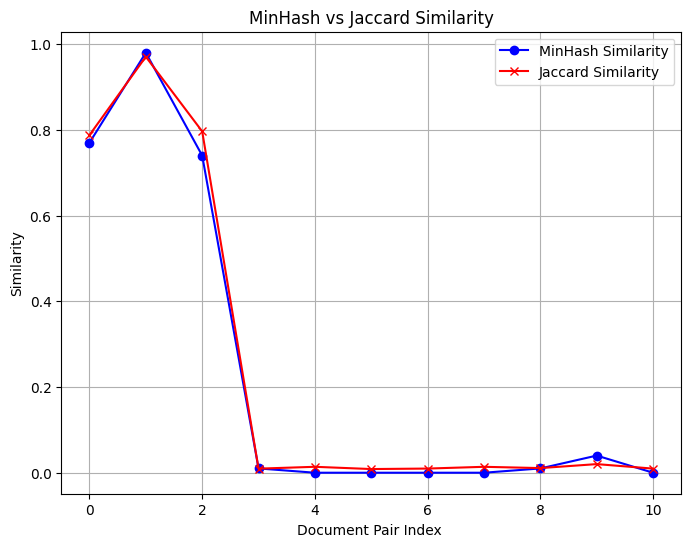

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(m_similarity)), m_similarity, label="MinHash Similarity", marker='o', linestyle='-', color='b')
plt.plot(range(len(j_similarity)), j_similarity, label="Jaccard Similarity", marker='x', linestyle='-', color='r')
plt.title("MinHash vs Jaccard Similarity")
plt.xlabel("Document Pair Index ")
plt.ylabel("Similarity")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [25]:
# lsh
lsh = cs.LSH(num_bands, rows_per_band)
candidate_pairs = lsh.find_candidate_pairs(signatures)

In [ ]:

# test
print("Candidate pairs:")

for pair in candidate_pairs:
    doc1, doc2 = pair
    jaccard_sim = cs.CompareSets.jaccard_similarity(set(shingles_list[doc1]), set(shingles_list[doc2]))
    if jaccard_sim >= similarity_threshold:
        print(f"Documents {doc1} and {doc2} are similar with Jaccard similarity {jaccard_sim:.2f}")

Candidate pairs:
Documents 2 and 4 are similar with Jaccard similarity 0.65
Documents 1 and 2 are similar with Jaccard similarity 0.79
Documents 3 and 4 are similar with Jaccard similarity 0.77
Documents 1 and 4 are similar with Jaccard similarity 0.80
Documents 2 and 3 are similar with Jaccard similarity 0.77
Documents 1 and 3 are similar with Jaccard similarity 0.97


In [ ]:
def test_scalability(documents, k, num_permutations, num_bands, rows_per_band, similarity_threshold):
    dataset_sizes = list(range(1, 13))
    execution_times = []

    for size in dataset_sizes:
        start_time = time.time()
        # Select subset of documents to test scalability
        subset_documents = documents[:size]

        # Shingling and generate vocabulary
        shingler = cs.Shingling(k)
        shingles_list = [shingler.shingle(doc) for doc in subset_documents]
        vocas = shingler.vocas_from_documents(*subset_documents)

        # Generate signature
        minhashing = cs.MinHashing(num_permutations, vocas)
        signatures = {i: minhashing.compute_minhash_signature(shingles) for i, shingles in enumerate(shingles_list)}

        # LSH
        lsh = cs.LSH(num_bands, rows_per_band)

        # Start measuring execution time
        candidate_pairs = lsh.find_candidate_pairs(signatures)
        end_time = time.time()

        # Record execution time
        execution_times.append(end_time - start_time)

        # Optional: Print the result for a specific dataset size
        print(f"Dataset size: {size} | Execution time: {execution_times[-1]:.4f} seconds")

    return dataset_sizes, execution_times

Dataset size: 1 | Execution time: 0.0570 seconds
Dataset size: 2 | Execution time: 0.1715 seconds
Dataset size: 3 | Execution time: 0.2056 seconds
Dataset size: 4 | Execution time: 0.2292 seconds
Dataset size: 5 | Execution time: 0.2673 seconds
Dataset size: 6 | Execution time: 0.9654 seconds
Dataset size: 7 | Execution time: 2.7254 seconds
Dataset size: 8 | Execution time: 4.3934 seconds
Dataset size: 9 | Execution time: 8.1763 seconds
Dataset size: 10 | Execution time: 12.6597 seconds
Dataset size: 11 | Execution time: 14.6815 seconds
Dataset size: 12 | Execution time: 17.2149 seconds


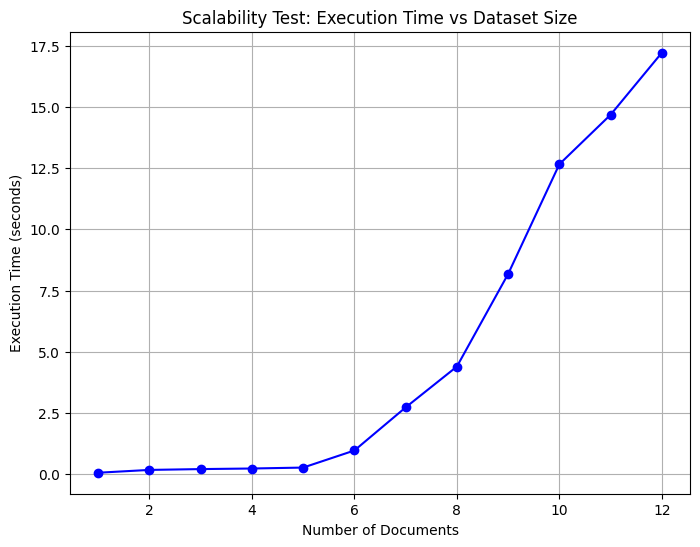

In [ ]:
dataset_sizes, execution_times = test_scalability(documents, k, num_permutations, num_bands, rows_per_band, similarity_threshold)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(dataset_sizes, execution_times, marker='o', linestyle='-', color='b')
plt.title("Scalability Test: Execution Time vs Dataset Size")
plt.xlabel("Number of Documents")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.show()